# Задача кредитного скоринга 
https://www.kaggle.com/c/home-credit-default-risk

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set()
from sklearn.preprocessing import LabelEncoder

In [2]:
train = pd.read_csv('../data/raw/application_train.csv')

In [3]:
train

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
0           24700.5  ...                 0                0                0   
1           35698.5  ...                 0                0                0   
2            6750.0  ...                 0                0                0   
3           29686.5  ...                 0                0                0   
4           21865.5  ...                 0                0                0   
...             ...  ...               ...              ...              ...   
307506      27558.0  ...                 0                0                0   
307507      12001.5  ...                 0                0                0   
307508      29979.0  ...                 0                0                0   
307509      20205.0  ...                 0                0                0   
307510      49117.5  ...                 0                0                0   

       FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                     0                        0.0                       0.0   
1                     0                        0.0                       0.0   
2                     0                        0.0                       0.0   
3                     0                        NaN                       NaN   
4                     0                        0.0                       0.0   
...                 ...                        ...                       ...   
307506                0                        NaN                       NaN   
307507                0                        NaN                       NaN   
307508                0                        1.0                       0.0   
307509                0                        0.0                       0.0   
307510                0                        0.0                       0.0   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                              0.0                        0.0   
1                              0.0                        0.0   
2                              0.0                        0.0   
3                              NaN                        NaN   
4                              

In [4]:
train[train['CODE_GENDER']=='M'].AMT_INCOME_TOTAL

0         202500.0
2          67500.0
4         121500.0
5          99000.0
7         360000.0
            ...   
307492    585000.0
307494    270000.0
307495    180000.0
307498    198000.0
307506    157500.0
Name: AMT_INCOME_TOTAL, Length: 105059, dtype: float64

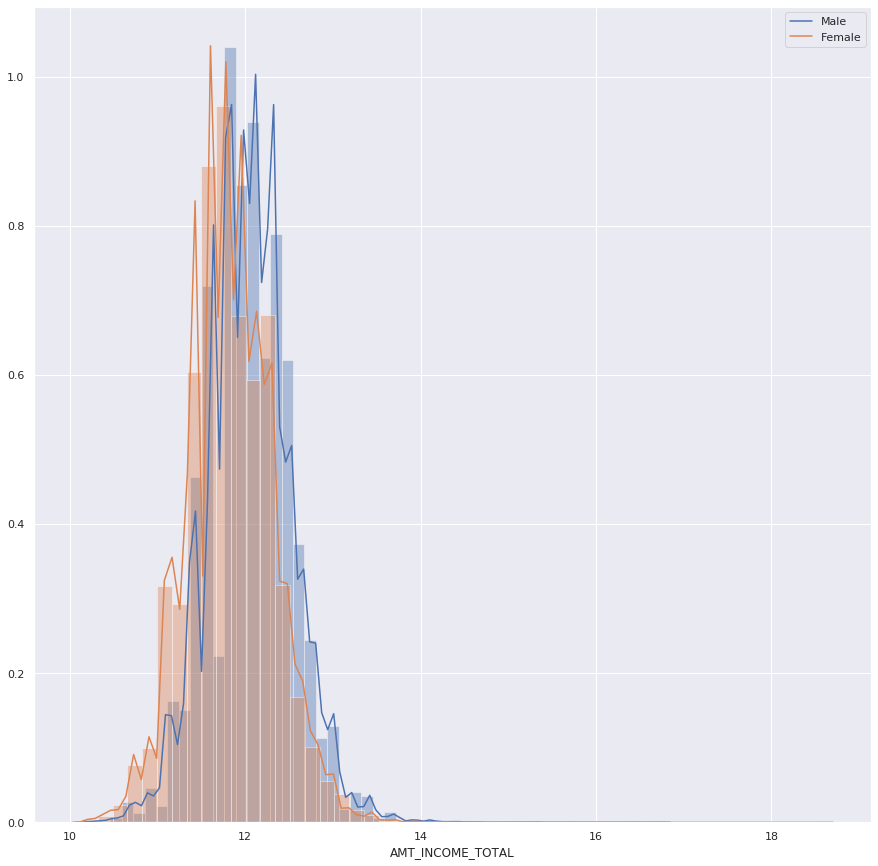

In [5]:
plt.figure(figsize=(15,15))
x = np.log(train[train['CODE_GENDER']=='M'].AMT_INCOME_TOTAL + 1)
y = np.log(train[train['CODE_GENDER']=='F'].AMT_INCOME_TOTAL + 1)
ax = sns.distplot(x,  kde_kws={"label":"Male"})
ax = sns.distplot(y,  kde_kws={"label":"Female"})

In [6]:
#Проверка нормальности распределения  
#https://medium.com/@rrfd/testing-for-normality-applications-with-python-6bf06ed646a9

In [7]:
x.median()

12.100717685412471

In [8]:
y.median()

11.813037464800539

In [9]:
x.std()

0.47015523567749745

In [10]:
y.std()

0.481426021852177

#### The Shapiro-Wilk test. As well the stats.shapiro method will throw a warning on samples for size > 5000. So, for data sets larger than that you might want to choose another test for normality.

In [11]:
stats.shapiro(x)

/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9880325198173523, 0.0)

#### Anderson-Darling. The Anderson-Darling tests if data comes from a particular distribution.

In [12]:
stats.anderson(x, dist='norm')

AndersonResult(statistic=347.46474126316025, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

Here our p value for .05 is outside the rejection region of 0.787, meaning we can reject the null hypothesis our data comes from a normal distribution.

In [13]:
stats.anderson(y, dist='norm')

AndersonResult(statistic=526.0543440466281, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

Here our p value for .05 is outside the rejection region of 0.787, meaning we can reject the null hypothesis our data comes from a normal distribution.

#### The Kolmogorov–Smirnov tests if a sample distribution fits a cumulative distribution function (CDF) of are referenced distribution. Or, if the CDF between of two different samples fit each other. Similar to Shapiro-Wilk, our null hypothesis for our sample is the distribution is identical to the other distribution we’re testing it against. If p < .05 we can reject the null, and conclude our sample distribution is not identical to a normal distribution.

In [14]:
stats.kstest(x, 'norm', args=(12.1, 0.47))

KstestResult(statistic=0.10060493089115474, pvalue=0.0)

In [15]:
stats.kstest(y, 'norm', args=(11.8, 0.48))

KstestResult(statistic=0.0853849509960829, pvalue=0.0)

In [16]:
def t_test(m1,m2,s1,s2,n1,n2):
    t = (m1-m2)/((s1**2)/n1 + (s2**2)/n2)**(1/2)
    return(t)

In [17]:
t_test(x.mean(), y.mean(), x.std(), y.std(), x.shape[0], y.shape[0])

122.27345815290329

In [18]:
#t>tкрит, гипотеза равенства мат ожиданий отвергается

In [19]:
stats.ttest_ind(x,y)

Ttest_indResult(statistic=121.35966866046637, pvalue=0.0)

In [20]:
x.size

105059

In [21]:
y.size

202448

## Линейные методы (лог регрессия)

In [22]:
train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

Text(0, 0.5, 'AMT_CREDIT')

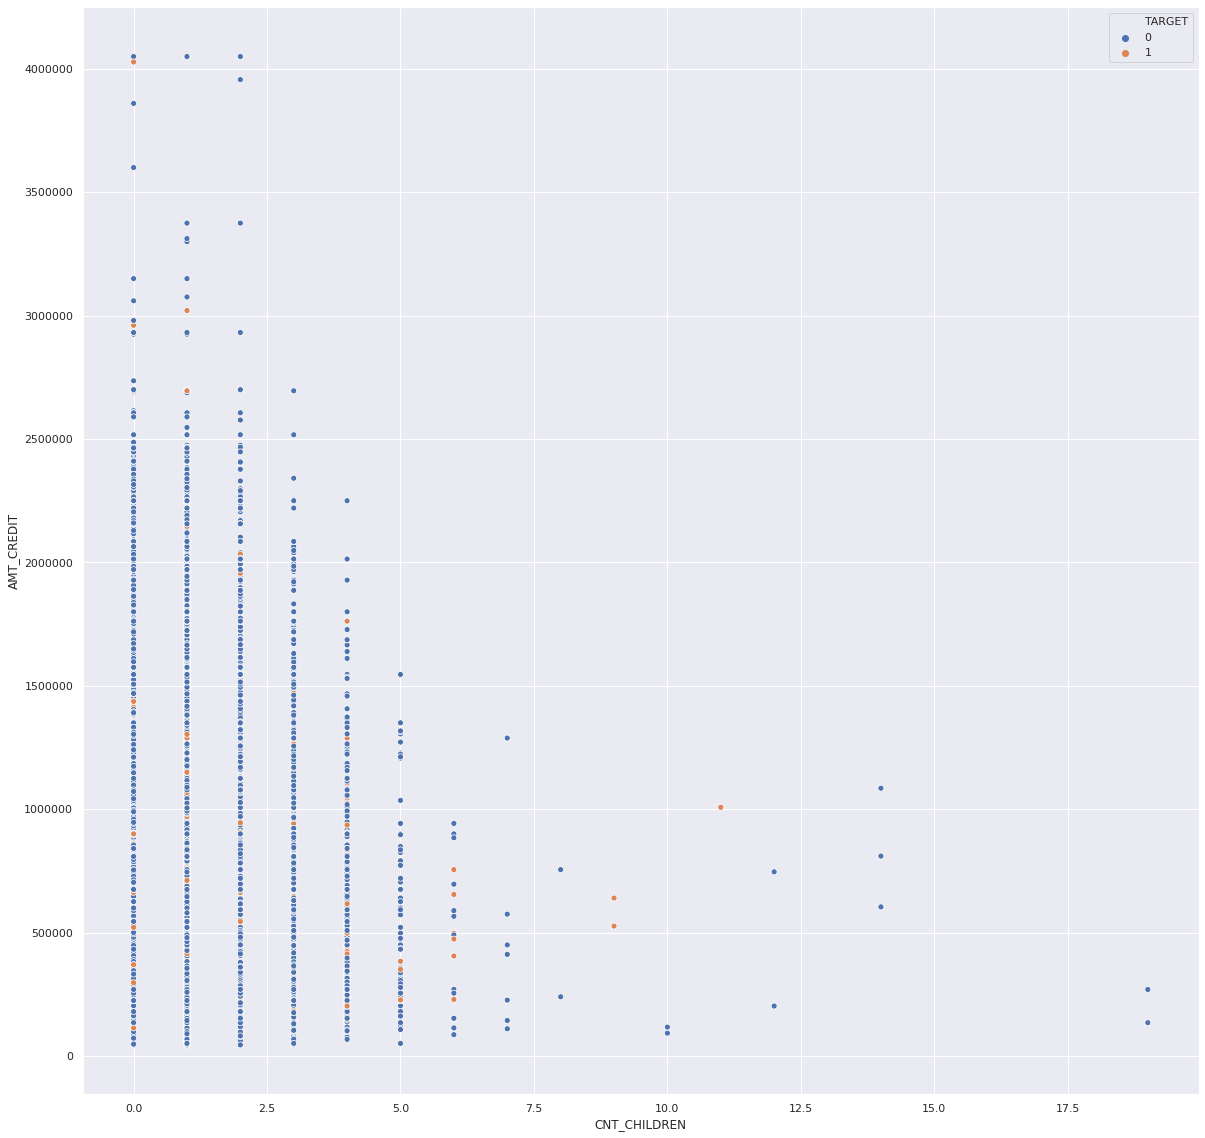

In [23]:
fig, ax = plt.subplots(figsize=(20,20))
# ax.set(xscale="log")
sns.scatterplot(x='CNT_CHILDREN', y='AMT_CREDIT', hue='TARGET', data=train)
ax.set_xlabel('CNT_CHILDREN')
ax.set_ylabel('AMT_CREDIT')


### features

In [24]:
features = train.iloc[:, 2:]

In [25]:
pd.set_option('display.max_columns', None)
features

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0              Cash loans           M            N               Y   
1              Cash loans           F            N               N   
2         Revolving loans           M            Y               Y   
3              Cash loans           F            N               Y   
4              Cash loans           M            N               Y   
...                   ...         ...          ...             ...   
307506         Cash loans           M            N               N   
307507         Cash loans           F            N               Y   
307508         Cash loans           F            N               Y   
307509         Cash loans           F            N               Y   
307510         Cash loans           F            N               N   

        CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                  0          202500.0    406597.5      24700.5   
1                  0          270000.0   1293502.5      35698.5   
2                  0           67500.0    135000.0       6750.0   
3                  0          135000.0    312682.5      29686.5   
4                  0          121500.0    513000.0      21865.5   
...              ...               ...         ...          ...   
307506             0          157500.0    254700.0      27558.0   
307507             0           72000.0    269550.0      12001.5   
307508             0          153000.0    677664.0      29979.0   
307509             0          171000.0    370107.0      20205.0   
307510             0          157500.0    675000.0      49117.5   

        AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0              351000.0   Unaccompanied               Working   
1             1129500.0          Family         State servant   
2              135000.0   Unaccompanied               Working   
3              297000.0   Unaccompanied               Working   
4              513000.0   Unaccompanied               Working   
...                 ...             ...                   ...   
307506         225000.0   Unaccompanied               Working   
307507         225000.0   Unaccompanied             Pensioner   
307508         585000.0   Unaccompanied               Working   
307509         319500.0   Unaccompanied  Commercial associate   
307510         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0       Secondary / secondary special  Single / not married   
1                    Higher education               Married   
2       Secondary / secondary special  Single / not married   
3       Secondary / secondary special        Civil marriage   
4       Secondary / secondary special  Single / not married   
...                               ...                   ...   
307506  Secondary / secondary special             Separated   
307507  Secondary / secondary special                 Widow   
307508               Higher education             Separated   
307509  Secondary / secondary special               Married   
307510               Higher education               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0       House / apartment                    0.018801       -9461   
1       House / apartment                    0.003541      -16765   
2       House / apartment                    0.010032      -19046   
3       House / apartment                    0.008019      -19005   
4       House / apartment                    0.028663      -19932   
...                   ...                         ...         ...   
307506       With parents                    0.032561       -9327   
307507  House / apartment                    0.025164      -20775   
307508  House / apartment                    0.005002      -14966   
307509  House / apartment                    0.005313      -11961   
307510  House / apartment                    0.046220      -1685

In [26]:
for i in features.columns:
    k = features[i].apply(lambda x: pd.isnull(x)).sum()
    if k > 0:
        print(i, '-----------------', k)

AMT_ANNUITY ----------------- 12
AMT_GOODS_PRICE ----------------- 278
NAME_TYPE_SUITE ----------------- 1292
OWN_CAR_AGE ----------------- 202929
OCCUPATION_TYPE ----------------- 96391
CNT_FAM_MEMBERS ----------------- 2
EXT_SOURCE_1 ----------------- 173378
EXT_SOURCE_2 ----------------- 660
EXT_SOURCE_3 ----------------- 60965
APARTMENTS_AVG ----------------- 156061
BASEMENTAREA_AVG ----------------- 179943
YEARS_BEGINEXPLUATATION_AVG ----------------- 150007
YEARS_BUILD_AVG ----------------- 204488
COMMONAREA_AVG ----------------- 214865
ELEVATORS_AVG ----------------- 163891
ENTRANCES_AVG ----------------- 154828
FLOORSMAX_AVG ----------------- 153020
FLOORSMIN_AVG ----------------- 208642
LANDAREA_AVG ----------------- 182590
LIVINGAPARTMENTS_AVG ----------------- 210199
LIVINGAREA_AVG ----------------- 154350
NONLIVINGAPARTMENTS_AVG ----------------- 213514
NONLIVINGAREA_AVG ----------------- 169682
APARTMENTS_MODE ----------------- 156061
BASEMENTAREA_MODE ----------------- 17

заменим пропуски на нули для лог регрессии 

In [27]:
features = features.fillna(0)

In [28]:
for i in features.columns:
    k = features[i].apply(lambda x: pd.isnull(x)).sum()
    if k > 0:
        print(i, '-----------------', k)

In [29]:
def categorial_transporm(data):
    categorials = []
    for i in data.columns: 
        if len(data[i].value_counts()) < 9:
            categorials.append(i)
#             print(i, '--------------', len(data[i].value_counts()))
    return(categorials)

+ WALLSMATERIAL_MODE + OCCUPATION_TYPE + ORGANIZATION_TYPE

In [30]:
categorials = categorial_transporm(features)
categorials.append('WALLSMATERIAL_MODE')
categorials.append('OCCUPATION_TYPE')
categorials.append('ORGANIZATION_TYPE')

In [31]:
categorials

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_

In [32]:
features['NAME_HOUSING_TYPE'].value_counts()

House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64

In [33]:
features[['CODE_GENDER', 'FLAG_EMAIL']]

CODE_GENDER  FLAG_EMAIL
0                M           0
1                F           0
2                M           0
3                F           0
4                M           0
...            ...         ...
307506           M           0
307507           F           0
307508           F           1
307509           F           0
307510           F           0

[307511 rows x 2 columns]

In [34]:
features[categorials] = features[categorials].astype(str)

In [35]:
le = LabelEncoder()
features[categorials] = features[categorials].apply(lambda col: le.fit_transform(col))

In [36]:
features

NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0                        0            1             0                1   
1                        0            0             0                0   
2                        1            1             1                1   
3                        0            0             0                1   
4                        0            1             0                1   
...                    ...          ...           ...              ...   
307506                   0            1             0                0   
307507                   0            0             0                1   
307508                   0            0             0                1   
307509                   0            0             0                1   
307510                   0            0             0                0   

        CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                  0          202500.0    406597.5      24700.5   
1                  0          270000.0   1293502.5      35698.5   
2                  0           67500.0    135000.0       6750.0   
3                  0          135000.0    312682.5      29686.5   
4                  0          121500.0    513000.0      21865.5   
...              ...               ...         ...          ...   
307506             0          157500.0    254700.0      27558.0   
307507             0           72000.0    269550.0      12001.5   
307508             0          153000.0    677664.0      29979.0   
307509             0          171000.0    370107.0      20205.0   
307510             0          157500.0    675000.0      49117.5   

        AMT_GOODS_PRICE  NAME_TYPE_SUITE  NAME_INCOME_TYPE  \
0              351000.0                7                 7   
1             1129500.0                2                 4   
2              135000.0                7                 7   
3              297000.0                7                 7   
4              513000.0                7                 7   
...                 ...              ...               ...   
307506         225000.0                7                 7   
307507         225000.0                7                 3   
307508         585000.0                7                 7   
307509         319500.0                7                 1   
307510         675000.0                7                 1   

        NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0                         4                   3                  1   
1                         1                   1                  1   
2                         4                   3                  1   
3                         4                   0                  1   
4                         4                   3                  1   
...                     ...                 ...                ...   
307506                    4                   2                  5   
307507                    4                   5                  1   
307508                    1                   2                  1   
307509                    4                   1                  1   
307510                    1                   1                  1   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0                         0.018801       -9461           -637   
1                         0.003541      -16765          -1188   
2                         0.010032      -19046           -225   
3                         0.008019      -19005          -3039   
4                         0.028663      -19932          -3038   
...                            ...         ...            ...   
307506                    0.032561       -9327           -236   
307507                    0.025164      -20775         365243   
307508                    0.005002      -14966          -7921   
307509                    0.005313      -11961          -4786   
307510       

In [37]:
multi_categorials = []
for i in categorials:
    if len(features[i].value_counts()) > 2:
        multi_categorials.append(i)

In [38]:
multi_categorials

['CODE_GENDER',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'WALLSMATERIAL_MODE',
 'OCCUPATION_TYPE',
 'ORGANIZATION_TYPE']

In [39]:
features[multi_categorials] = features[multi_categorials].astype(str)

In [40]:
features.shape

(307511, 120)

В зависимости от имеющихся у нас данных мы можем столкнуться с ситуацией, когда после кодирования признаков наша модель запутается, ложно предположив, что данные связаны порядком или иерархией, которого на самом деле нет. Чтобы этого избежать мы воспользуемся OneHotEncoder для признаков с более чем одной категорией. https://towardsdatascience.com/encoding-categorical-features-21a2651a065c                   https://habr.com/ru/post/456294/

In [41]:
from sklearn.preprocessing import OneHotEncoder

In [42]:
onehot_encoder = OneHotEncoder(sparse=False, dtype = int)
encoded_categorical_columns = pd.DataFrame(onehot_encoder.fit_transform(features[multi_categorials]))

/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [43]:
encoded_categorical_columns[2].value_counts()

0    307507
1         4
Name: 2, dtype: int64

In [44]:
encoded_categorical_columns = encoded_categorical_columns.drop(columns=2)

In [45]:
len(multi_categorials)

17

In [46]:
features.shape

(307511, 120)

In [47]:
features = features.drop(columns = multi_categorials)

In [48]:
features.shape

(307511, 104)

In [49]:
encoded_categorical_columns

0    1    3    4    5    6    7    8    9    10   11   12   13   14   \
0         0    1    0    0    0    0    0    0    0    1    0    0    0    0   
1         1    0    0    0    1    0    0    0    0    0    0    0    0    0   
2         0    1    0    0    0    0    0    0    0    1    0    0    0    0   
3         1    0    0    0    0    0    0    0    0    1    0    0    0    0   
4         0    1    0    0    0    0    0    0    0    1    0    0    0    0   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
307506    0    1    0    0    0    0    0    0    0    1    0    0    0    0   
307507    1    0    0    0    0    0    0    0    0    1    0    0    0    1   
307508    1    0    0    0    0    0    0    0    0    1    0    0    0    0   
307509    1    0    0    0    0    0    0    0    0    1    0    1    0    0   
307510    1    0    0    0    0    0    0    0    0    1    0    1    0    0   

        15   16   17   18   19   20   21   22   23   24   25   26   27   28   \
0         0    0    0    1    0    0    0    0    1    0    0    0    1    0   
1         1    0    0    0    0    1    0    0    0    0    1    0    0    0   
2         0    0    0    1    0    0    0    0    1    0    0    0    1    0   
3         0    0    0    1    0    0    0    0    1    1    0    0    0    0   
4         0    0    0    1    0    0    0    0    1    0    0    0    1    0   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
307506    0    0    0    1    0    0    0    0    1    0    0    1    0    0   
307507    0    0    0    0    0    0    0    0    1    0    0    0    0    0   
307508    0    0    0    1    0    1    0    0    0    0    0    1    0    0   
307509    0    0    0    0    0    0    0    0    1    0    1    0    0    0   
307510    0    0    0    0    0    1    0    0    0    0    1    0    0    0   

        29   30   31   32   33   34   35   36   37   38   39   40   41   42   \
0         0    0    1    0    0    0    0    0    1    0    0    1    0    0   
1         0    0    1    0    0    0    0    1    0    0    1    0    0    0   
2         0    0    1    0    0    0    0    0    1    0    0    1    0    0   
3         0    0    1    0    0    0    0    0    1    0    0    1    0    0   
4         0    0    1    0    0    0    0    0    1    0    0    1    0    0   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
307506    0    0    0    0    0    0    1    1    0    0    1    0    0    0   
307507    1    0    1    0    0    0    0    0    1    0    0    1    0    0   
307508    0    0    1    0    0    0    0    0    0    1    0    0    1    0   
307509    0    0    1    0    0    0    0    0    1    0    0    1    0    0   
307510    0    0    1    0    0    0    0    1    0    0    1    0    0    0   

        43   44   45   46   47   48   49   50   51   52   53   54   55   56   \
0         0    0    0    0    0    1    0    0    0    1    0    0    1    0   
1         1    0    0    0    0    0    0    0    0    1    0    0    1    0   
2         1    0    0    0    0    0    1    0    0    0    0    1    0    0   
3         0    0    0    0    0    1    1    0    0    0    0    1    0    0   
4         0    0    0    1    0    0    1    0    0    0    0    1    0    0   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
307506    0    0    0    1    0    0    0    0    0    1    0    0    1    0   
307507    1    0    0    0    0    0    0    0    0    1    0    0    1    0   
307508    0    0    0    1    0    0    0    0    0    1    0    0    1    0   
307509    0    0    0    0    0    1    1    0    0    0    0    0    1    0   
307510    0    0    0    1    0    0    1    0    0    0    0    0    1    0   

        57   58   59   60   61   62   63   64   65   66   67   68   69   70   \
0         0    0    0    0    0    0    0    1    0    0    1    0    1    0   
1   

In [50]:
features = pd.concat([features, encoded_categorical_columns], axis=1, join='inner')

In [51]:
features.shape

(307511, 262)

In [52]:
features.columns = features.columns.astype(str)

In [53]:
# Линейные алгоритмы чувствительны к масштабу признаков. 
#Отшкалируем признаки, используя sklearn.preprocessing.StandartScaller

In [54]:
binary_features_columns = []
for i in features.columns:
    k = features[i].apply(lambda x: (x == 0) or (x == 1)).sum()
    if k == features[i].shape[0]:
        binary_features_columns.append(i)

In [55]:
binary_features_columns

['NAME_CONTRACT_TYPE',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 '0',
 '1',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
sc = StandardScaler()

In [58]:
old_list = features.columns

In [59]:
quantitative_list = features.columns.drop(binary_features_columns)

In [60]:
X = sc.fit_transform(features[quantitative_list])

In [61]:
X = pd.DataFrame(X)
X.columns = quantitative_list

In [62]:
X.head()

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0     -0.577538          0.142129   -0.478095    -0.166065        -0.505662   
1     -0.577538          0.426792    1.725450     0.592710         1.600480   
2     -0.577538         -0.427196   -1.152888    -1.404507        -1.090025   
3     -0.577538         -0.142533   -0.711430     0.177929        -0.651753   
4     -0.577538         -0.199466   -0.213734    -0.361658        -0.067390   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                   -0.149452    1.506880      -0.456215           0.379837   
1                   -1.252750   -0.166821      -0.460115           1.078697   
2                   -0.783451   -0.689509      -0.453299           0.206116   
3                   -0.928991   -0.680114      -0.473217          -1.375829   
4                    0.563570   -0.892535      -0.473210           0.191639   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  CNT_FAM_MEMBERS  HOUR_APPR_PROCESS_START  \
0         0.579154    -0.455284        -1.265685                -0.631821   
1         1.790855    -0.455284        -0.167621                -0.325620   
2         0.306869     2.430559        -1.265685                -0.938022   
3         0.369143    -0.455284        -0.167621                 1.511587   
4        -0.307263    -0.455284        -1.265685                -0.325620   

   EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  \
0     -0.476522     -1.301593     -1.007542       -0.345180          0.003066   
1      0.323239      0.566501     -1.527258        0.396431          0.236003   
2     -0.767499      0.221612      1.193214       -0.602452         -0.534146   
3     -0.767499      0.713100     -1.527258       -0.602452         -0.534146   
4     -0.767499     -0.990729     -1.527258       -0.602452         -0.534146   

   YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  \
0                     0.960978         1.016443        0.018432   
1                     0.987275         1.505968        1.012286   
2                    -1.020852        -0.698001       -0.289190   
3                    -1.020852        -0.698001       -0.289190   
4                    -1.020852        -0.698001       -0.289190   

   ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  \
0      -0.368513      -0.051932      -0.198993       0.355764      0.162782   
1       0.431106      -0.387436       1.165958       1.824859     -0.228092   
2      -0.368513      -0.722940      -0.744581      -0.525834     -0.440702   
3      -0.368513      -0.722940      -0.744581      -0.525834     -0.440702   
4      -0.368513      -0.722940      -0.744581      -0.525834     -0.440702   

   LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  \
0             -0.166853       -0.364140                -0.100846   
1              0.648129        0.014866                 0.045223   
2             -0.455166       -0.564727                -0.100846   
3             -0.455166       -0.564727                -0.100846   
4             -0.455166       -0.564727                -0.100846   

   NONLIVINGAREA_AVG  APARTMENTS_MODE  BASEMENTAREA_MODE  \
0          -0.261343        -0.327407           0.028603   
1          -0.059838         0.380977           0.252119   
2          -0.261343        -0.593050          -0.523697   
3          -0.261343        -0.593050          -0.523697   
4          -0.261343        -0.593050          -0.523697   

   YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  COMMONAREA_MODE  \
0                      0.961652          1.042389         0.034883   
1                      0.987948          1.508933         0.814370   
2                     -1.020127         -0.698841        -0.283095   
3                     -1.020127         -0.698841        -0.283095   
4                     -1.020127         -0.698841        -0.283095   

   ELEVATORS_MODE  ENTRANCES_MODE 

In [63]:
features.loc[:, quantitative_list] = X.loc[:, quantitative_list]

In [64]:
features

NAME_CONTRACT_TYPE  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  \
0                        0             0                1     -0.577538   
1                        0             0                0     -0.577538   
2                        1             1                1     -0.577538   
3                        0             0                1     -0.577538   
4                        0             0                1     -0.577538   
...                    ...           ...              ...           ...   
307506                   0             0                0     -0.577538   
307507                   0             0                1     -0.577538   
307508                   0             0                1     -0.577538   
307509                   0             0                1     -0.577538   
307510                   0             0                0     -0.577538   

        AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0               0.142129   -0.478095    -0.166065        -0.505662   
1               0.426792    1.725450     0.592710         1.600480   
2              -0.427196   -1.152888    -1.404507        -1.090025   
3              -0.142533   -0.711430     0.177929        -0.651753   
4              -0.199466   -0.213734    -0.361658        -0.067390   
...                  ...         ...          ...              ...   
307506         -0.047646   -0.855489     0.031080        -0.846541   
307507         -0.408219   -0.818594    -1.042195        -0.846541   
307508         -0.066623    0.195379     0.198110         0.127398   
307509          0.009287   -0.568757    -0.476219        -0.590882   
307510         -0.047646    0.188760     1.518514         0.370883   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0                        -0.149452    1.506880      -0.456215   
1                        -1.252750   -0.166821      -0.460115   
2                        -0.783451   -0.689509      -0.453299   
3                        -0.928991   -0.680114      -0.473217   
4                         0.563570   -0.892535      -0.473210   
...                            ...         ...            ...   
307506                    0.845396    1.537586      -0.453377   
307507                    0.310593   -1.085707       2.133617   
307508                   -1.147120    0.245417      -0.507774   
307509                   -1.124635    0.934008      -0.485583   
307510                    1.832942   -0.187674      -0.460639   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
0                0.379837         0.579154    -0.455284           1   
1                1.078697         1.790855    -0.455284           1   
2                0.206116         0.306869     2.430559           1   
3               -1.375829         0.369143    -0.455284           1   
4                0.191639        -0.307263    -0.455284           1   
...                   ...              ...          ...         ...   
307506          -0.984955         0.670578    -0.455284           1   
307507           0.169782        -0.725959    -0.455284           1   
307508          -0.497002        -1.428203    -0.455284           1   
307509           0.688107         1.366859    -0.455284           1   
307510          -0.040274         1.712018    -0.455284           1   

        FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0                    1                0                 1           1   
1                    1                0                 1           1   
2                    1                1                 1           1   
3                    1                0                 1           0   
4                    1                0                 1           0   
...                ...              ...               ...         ...   
307506               1                0                 1           0   
307507               0                0         

### target

In [65]:
target = train.loc[:, 'TARGET']

In [66]:
target

0         1
1         0
2         0
3         0
4         0
         ..
307506    0
307507    0
307508    0
307509    1
307510    0
Name: TARGET, Length: 307511, dtype: int64

### Cross-Validation

In [67]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import datetime

In [68]:
from sklearn import linear_model

In [ ]:
# clf = linear_model.SGDClassifier(max_iter=1000, tol=1e-3)

In [69]:
kf = KFold(n_splits = 5, shuffle = True)

In [70]:
results = {}
for i in range(-3,6):
    start_time = datetime.datetime.now()
    clf = linear_model.SGDClassifier(loss = 'log', penalty ='elasticnet', alpha=  10**(i))#C = 10**(i)
    cv_score = cross_val_score( estimator = clf, X = features, y = target, scoring = 'roc_auc', cv = kf)
    results[10**(i)] = (datetime.datetime.now() - start_time), cv_score.mean()

In [71]:
for key in results.keys(): 
    print ('Time elapsed:', results[key][0],
          'C-parametr:', key,
          'score:', results[key][1])

Time elapsed: 0:00:15.115902 C-parametr: 0.001 score: 0.7246433183713211
Time elapsed: 0:00:16.654800 C-parametr: 0.01 score: 0.717295239663341
Time elapsed: 0:00:14.843993 C-parametr: 0.1 score: 0.6887837673327025
Time elapsed: 0:00:17.384422 C-parametr: 1 score: 0.5
Time elapsed: 0:00:25.553145 C-parametr: 10 score: 0.5
Time elapsed: 0:00:16.634741 C-parametr: 100 score: 0.5
Time elapsed: 0:00:14.345059 C-parametr: 1000 score: 0.5
Time elapsed: 0:00:14.422622 C-parametr: 10000 score: 0.5
Time elapsed: 0:00:14.292958 C-parametr: 100000 score: 0.5


In [72]:
features.describe()

NAME_CONTRACT_TYPE   FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  \
count       307511.000000  307511.000000    307511.000000  3.075110e+05   
mean             0.095213       0.340108         0.693673 -3.207148e-17   
std              0.293509       0.473746         0.460968  1.000002e+00   
min              0.000000       0.000000         0.000000 -5.775378e-01   
25%              0.000000       0.000000         0.000000 -5.775378e-01   
50%              0.000000       0.000000         1.000000 -5.775378e-01   
75%              0.000000       1.000000         1.000000  8.072731e-01   
max              1.000000       1.000000         1.000000  2.573387e+01   

       AMT_INCOME_TOTAL    AMT_CREDIT   AMT_ANNUITY  AMT_GOODS_PRICE  \
count      3.075110e+05  3.075110e+05  3.075110e+05     3.075110e+05   
mean      -1.590866e-17 -4.074788e-17 -3.412794e-17    -8.722611e-17   
std        1.000002e+00  1.000002e+00  1.000002e+00     1.000002e+00   
min       -6.036870e-01 -1.376496e+00 -1.870204e+00    -1.455252e+00   
25%       -2.374210e-01 -8.174760e-01 -7.301786e-01    -8.100179e-01   
50%       -9.129414e-02 -2.124151e-01 -1.520941e-01    -2.378290e-01   
75%        1.421293e-01  5.208178e-01  5.166460e-01     3.830569e-01   
max        4.927034e+02  8.574059e+00  1.593151e+01     9.501557e+00   

       REGION_POPULATION_RELATIVE    DAYS_BIRTH  DAYS_EMPLOYED  \
count                3.075110e+05  3.075110e+05   3.075110e+05   
mean                 3.468826e-16  3.364271e-17   4.789927e-17   
std                  1.000002e+00  1.000002e+00   1.000002e+00   
min                 -1.487798e+00 -2.106335e+00  -5.784940e-01   
25%                 -7.853308e-01 -8.352476e-01  -4.712426e-01   
50%                 -1.459095e-01  6.576450e-02  -4.602923e-01   
75%                  5.635704e-01  8.304332e-01  -4.537519e-01   
max                  3.733564e+00  1.958761e+00   2.133617e+00   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH   OWN_CAR_AGE     FLAG_MOBIL  \
count       3.075110e+05     3.075110e+05  3.075110e+05  307511.000000   
mean       -6.100051e-18     6.732007e-17  3.567606e-17       0.999997   
std         1.000002e+00     1.000002e+00  1.000002e+00       0.001803   
min        -5.588007e+00    -2.784328e+00 -4.552838e-01       0.000000   
25%        -7.077673e-01    -8.644204e-01 -4.552838e-01       1.000000   
50%         1.368540e-01    -1.721143e-01 -4.552838e-01       1.000000   
75%         8.447974e-01     8.441512e-01  9.968598e-02       1.000000   
max         1.415353e+00     1.983641e+00  9.645167e+00       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  HOUR_APPR_PROCESS_START  \
count  307511.000000     3.075110e+05             3.075110e+05   
mean        0.056720    -7.165249e-17            -8.281282e-17   
std         0.231307     1.000002e+00             1.000002e+00   
min         0.000000    -2.363749e+00            -3.693833e+00   
25%         0.000000    -1.676211e-01            -6.318213e-01   
50%         0.000000    -1.676211e-01            -1.941893e-02   
75%         0.000000     9.304430e-01             5.929834e-01   
max         1.000000     1.959753e+01             3.348794e+00   

       REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
count               307511.000000               307511.000000   
mean               

In [73]:
target.value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

In [74]:
roc_auc_score(target, target*0+0.8)

0.5

In [75]:
import gc
gc.collect()

209

### Main features selection

In [76]:
def feature_importance(y, feature):
    kf = KFold(n_splits = 5, shuffle = True)
    
    clf = LogisticRegression( C = 1000)
    cv_score = cross_val_score( estimator = clf, X = pd.DataFrame(feature), y = y, scoring = 'roc_auc', cv = kf)
    
    return(cv_score.mean())
    

In [77]:
EXT_SOURCE_3_result = feature_importance(target, features.loc[:,'EXT_SOURCE_3'])

/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

In [78]:
features[quantitative_list]

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0          -0.577538          0.142129   -0.478095    -0.166065   
1          -0.577538          0.426792    1.725450     0.592710   
2          -0.577538         -0.427196   -1.152888    -1.404507   
3          -0.577538         -0.142533   -0.711430     0.177929   
4          -0.577538         -0.199466   -0.213734    -0.361658   
...              ...               ...         ...          ...   
307506     -0.577538         -0.047646   -0.855489     0.031080   
307507     -0.577538         -0.408219   -0.818594    -1.042195   
307508     -0.577538         -0.066623    0.195379     0.198110   
307509     -0.577538          0.009287   -0.568757    -0.476219   
307510     -0.577538         -0.047646    0.188760     1.518514   

        AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0             -0.505662                   -0.149452    1.506880   
1              1.600480                   -1.252750   -0.166821   
2             -1.090025                   -0.783451   -0.689509   
3             -0.651753                   -0.928991   -0.680114   
4             -0.067390                    0.563570   -0.892535   
...                 ...                         ...         ...   
307506        -0.846541                    0.845396    1.537586   
307507        -0.846541                    0.310593   -1.085707   
307508         0.127398                   -1.147120    0.245417   
307509        -0.590882                   -1.124635    0.934008   
307510         0.370883                    1.832942   -0.187674   

        DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0           -0.456215           0.379837         0.579154    -0.455284   
1           -0.460115           1.078697         1.790855    -0.455284   
2           -0.453299           0.206116         0.306869     2.430559   
3           -0.473217          -1.375829         0.369143    -0.455284   
4           -0.473210           0.191639        -0.307263    -0.455284   
...               ...                ...              ...          ...   
307506      -0.453377          -0.984955         0.670578    -0.455284   
307507       2.133617           0.169782        -0.725959    -0.455284   
307508      -0.507774          -0.497002        -1.428203    -0.455284   
307509      -0.485583           0.688107         1.366859    -0.455284   
307510      -0.460639          -0.040274         1.712018    -0.455284   

        CNT_FAM_MEMBERS  HOUR_APPR_PROCESS_START  EXT_SOURCE_1  EXT_SOURCE_2  \
0             -1.265685                -0.631821     -0.476522     -1.301593   
1             -0.167621                -0.325620      0.323239      0.566501   
2             -1.265685                -0.938022     -0.767499      0.221612   
3             -0.167621                 1.511587     -0.767499      0.713100   
4             -1.265685                -0.325620     -0.767499     -0.990729   
...                 ...                      ...           ...           ...   
307506        -1.265685                 0.899185     -0.257393      0.875270   
307507        -1.265685                -1.244224     -0.767499     -2.065664   
307508        -1.265685                -0.938022      1.839706      0.116636   
307509        -0.167621                -0.938022     -0.767499      0.004545   
307510        -0.167621                 2.430190      1.806183      1.015321   

        EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  \
0          -1.007542       -0.345180          0.003066   
1          -1.527258        0.396431          0.236003   
2           1.193214       -0.602452         -0.534146   
3          -1.527258       -0.602452         -0.534146   
4          -1.527258       -0.602452         -0.534146   
...              ...             ...               ...   
307506     -1.527258        1.502597          0.757201   
307507     -1.527258       -0.345180          0.099153   
307508     -0.711157      

In [142]:
def all_features_importance(features, target):
    final_features_importance_dict = {}
    for column in features.columns:
        result = feature_importance(target, features[column])
        final_features_importance_dict[column] = result
    return(final_features_importance_dict)

In [143]:
all_features_importance = all_features_importance(features[quantitative_list], target)

/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

In [144]:
all_features_importance = pd.DataFrame.from_dict(all_features_importance, orient='index')

In [145]:
all_features_importance = all_features_importance.reset_index()

In [146]:
all_features_importance.columns = ['feature','cv_score']

In [148]:
all_features_importance = all_features_importance.sort_values(by = ['cv_score'], ascending = False).reset_index(drop=True)
# all_features_importance = all_features_importance.reindex(range(69))
# all_features_importance = all_features_importance.sort_values(by = 'cv_score', ascending =False)
all_features_importance


feature  cv_score
0                 EXT_SOURCE_2  0.655435
1                 EXT_SOURCE_3  0.627870
2                   DAYS_BIRTH  0.583022
3       DAYS_LAST_PHONE_CHANGE  0.556859
4              DAYS_ID_PUBLISH  0.555669
..                         ...       ...
64  AMT_REQ_CREDIT_BUREAU_WEEK  0.500461
65   AMT_REQ_CREDIT_BUREAU_DAY  0.500454
66                 AMT_ANNUITY  0.500020
67                 OWN_CAR_AGE  0.487656
68               DAYS_EMPLOYED  0.473440

[69 rows x 2 columns]

In [151]:
pd.options.display.max_rows = 100
all_features_importance

feature  cv_score
0                   EXT_SOURCE_2  0.655435
1                   EXT_SOURCE_3  0.627870
2                     DAYS_BIRTH  0.583022
3         DAYS_LAST_PHONE_CHANGE  0.556859
4                DAYS_ID_PUBLISH  0.555669
5                  FLOORSMAX_AVG  0.548688
6                 FLOORSMAX_MEDI  0.548597
7                 FLOORSMAX_MODE  0.548382
8                 TOTALAREA_MODE  0.548343
9                   EXT_SOURCE_1  0.546420
10                LIVINGAREA_AVG  0.546283
11               LIVINGAREA_MEDI  0.546125
12               LIVINGAREA_MODE  0.545670
13                APARTMENTS_AVG  0.545236
14               APARTMENTS_MEDI  0.545122
15               APARTMENTS_MODE  0.544716
16  YEARS_BEGINEXPLUATATION_MEDI  0.544425
17   YEARS_BEGINEXPLUATATION_AVG  0.544345
18  YEARS_BEGINEXPLUATATION_MODE  0.544341
19                 ENTRANCES_AVG  0.543308
20                ENTRANCES_MEDI  0.543284
21                ENTRANCES_MODE  0.542702
22             DAYS_REGISTRATION  0.542537
23              BASEMENTAREA_AVG  0.534897
24             BASEMENTAREA_MEDI  0.534804
25             BASEMENTAREA_MODE  0.533822
26               AMT_GOODS_PRICE  0.533248
27    REGION_POPULATION_RELATIVE  0.532346
28                 ELEVATORS_AVG  0.530064
29               YEARS_BUILD_AVG  0.529781
30              YEARS_BUILD_MEDI  0.529775
31              YEARS_BUILD_MODE  0.529753
32                ELEVATORS_MEDI  0.529534
33                 FLOORSMIN_AVG  0.528577
34                FLOORSMIN_MEDI  0.528540
35                FLOORSMIN_MODE  0.528453
36          LIVINGAPARTMENTS_AVG  0.528256
37         LIVINGAPARTMENTS_MEDI  0.528234
38                ELEVATORS_MODE  0.528118
39         LIVINGAPARTMENTS_MODE  0.528014
40                  LANDAREA_AVG  0.527493
41                 LANDAREA_MEDI  0.527227
42                 LANDAREA_MODE  0.526434
43             NONLIVINGAREA_AVG  0.525789
44            NONLIVINGAREA_MEDI  0.524783
45       HOUR_APPR_PROCESS_START  0.524208
46            NONLIVINGAREA_MODE  0.522996
47                COMMONAREA_AVG  0.522838
48               COMMONAREA_MEDI  0.522660
49               COMMONAREA_MODE  0.522078
50              AMT_INCOME_TOTAL  0.519099
51      DEF_30_CNT_SOCIAL_CIRCLE  0.518926
52                    AMT_CREDIT  0.518603
53                  CNT_CHILDREN  0.517124
54      DEF_60_CNT_SOCIAL_CIRCLE  0.515788
55       NONLIVINGAPARTMENTS_AVG  0.511378
56      NONLIVINGAPARTMENTS_MEDI  0.510661
57      OBS_30_CNT_SOCIAL_CIRCLE  0.509554
58      OBS_60_CNT_SOCIAL_CIRCLE  0.509383
59      NONLIVINGAPARTMENTS_MODE  0.509376
60     AMT_REQ_CREDIT_BUREAU_QRT  0.509229
61     AMT_REQ_CREDIT_BUREAU_MON  0.507317
62               CNT_FAM_MEMBERS  0.506824
63    AMT_REQ_CREDIT_BUREAU_YEAR  0.501001
64    AMT_REQ_CREDIT_BUREAU_WEEK  0.500461
65     AMT_REQ_CREDIT_BUREAU_DAY  0.500454
66                   AMT_ANNUITY  0.500020
67                   OWN_CAR_AGE  0.487656
68                 DAYS_EMPLOYED  0.473440

In [96]:
# обучим модель на n важных признаках

In [154]:
def cv_from_features_number(number, all_features_importance, data, target):
 
    main_features = all_features_importance.loc[:number, 'feature']
    cv_mean = feature_importance(target, data[main_features])
    return (cv_mean)

In [155]:
result = {}
for i in range(all_features_importance.shape[0]):
    cv_mean_i = cv_from_features_number(i, all_features_importance, features, target)
    result[i] = cv_mean_i
    
    print(i, cv_mean_i)
    

/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

0 0.6553940661606308


/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

1 0.6891318147969064


/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

2 0.6954027097553136


/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

3 0.6960078400883324


/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

4 0.696706532276499


/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

5 0.6989326055667403


/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

6 0.698949815111803


/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

7 0.6989027282429687


/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

8 0.6989466192796095


/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

9 0.7044270384133465


/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

10 0.7045001142113477


/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

11 0.7043654639992875


/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

12 0.7043897027921749


/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

13 0.7044113153112918


/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

14 0.7043749747526709


/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

15 0.7043904159888308


/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

16 0.7043503528652616


/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

17 0.704462584457637


/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

18 0.7043116043146561


/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

19 0.7044732598397057


/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

20 0.704444884338374


/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

21 0.7043851091325599


/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

22 0.7047880097014156


/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

23 0.7048982930019736


/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

24 0.7048265870708245


/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

25 0.704752470311275


/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

26 0.7049135457887393


/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

27 0.7050963977344444


/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

28 0.7049883648520682


/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

29 0.7049427634525266


/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

30 0.704907559380862


/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

31 0.7048048973780379


/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

32 0.7048297316680145


/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

33 0.704797036750449


/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

34 0.704868186211624


/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

35 0.7047139594440963


/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

36 0.7048582459178664


/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

37 0.7047012476439771


/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

38 0.7048630537136493


/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

39 0.7048885151971097


/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

40 0.7047698328938539


/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

41 0.7048086805004405


/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

42 0.7048037171369032


/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

43 0.7048313766395928


/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

44 0.7046711962756774


/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

45 0.7046276026798419


/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

46 0.7048355216117782


/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

47 0.7047692398123049


/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

48 0.704812364527567


/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

49 0.7047927768174842


/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

50 0.7048036225137946


/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

51 0.7063041865039648


/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

52 0.7115932352857663


/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

53 0.7116112078043759


/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

54 0.7115355937925172


/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

55 0.7115406269786437


/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

56 0.7116046784840299


/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

57 0.711315895452917


/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

58 0.7113925336152251


/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

59 0.7114565640867749


/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

60 0.7115512824260641


/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

61 0.7114814911447349


/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

62 0.7114875832643595


/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

63 0.7133526951088273


/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

64 0.7134521739169821


/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

65 0.7135632717584566


/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

66 0.7148189583205891


/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

67 0.7146566130901099


/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/kaggle/credit/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

68 0.7149625475769363


In [156]:
cv_from_features_number = pd.DataFrame.from_dict(result, orient='index')
cv_from_features_number = cv_from_features_number.reset_index()
cv_from_features_number.columns = ['Features number', 'cv score']

In [157]:
cv_from_features_number

Features number  cv score
0                 0  0.655394
1                 1  0.689132
2                 2  0.695403
3                 3  0.696008
4                 4  0.696707
5                 5  0.698933
6                 6  0.698950
7                 7  0.698903
8                 8  0.698947
9                 9  0.704427
10               10  0.704500
11               11  0.704365
12               12  0.704390
13               13  0.704411
14               14  0.704375
15               15  0.704390
16               16  0.704350
17               17  0.704463
18               18  0.704312
19               19  0.704473
20               20  0.704445
21               21  0.704385
22               22  0.704788
23               23  0.704898
24               24  0.704827
25               25  0.704752
26               26  0.704914
27               27  0.705096
28               28  0.704988
29               29  0.704943
30               30  0.704908
31               31  0.704805
32               32  0.704830
33               33  0.704797
34               34  0.704868
35               35  0.704714
36               36  0.704858
37               37  0.704701
38               38  0.704863
39               39  0.704889
40               40  0.704770
41               41  0.704809
42               42  0.704804
43               43  0.704831
44               44  0.704671
45               45  0.704628
46               46  0.704836
47               47  0.704769
48               48  0.704812
49               49  0.704793
50               50  0.704804
51               51  0.706304
52               52  0.711593
53               53  0.711611
54               54  0.711536
55               55  0.711541
56               56  0.711605
57               57  0.711316
58               58  0.711393
59               59  0.711457
60               60  0.711551
61               61  0.711481
62               62  0.711488
63               63  0.713353
64               64  0.713452
65               65  0.713563
66               66  0.714819
67               67  0.714657
68               68  0.714963

Text(0.5, 1.0, 'CV from features number')

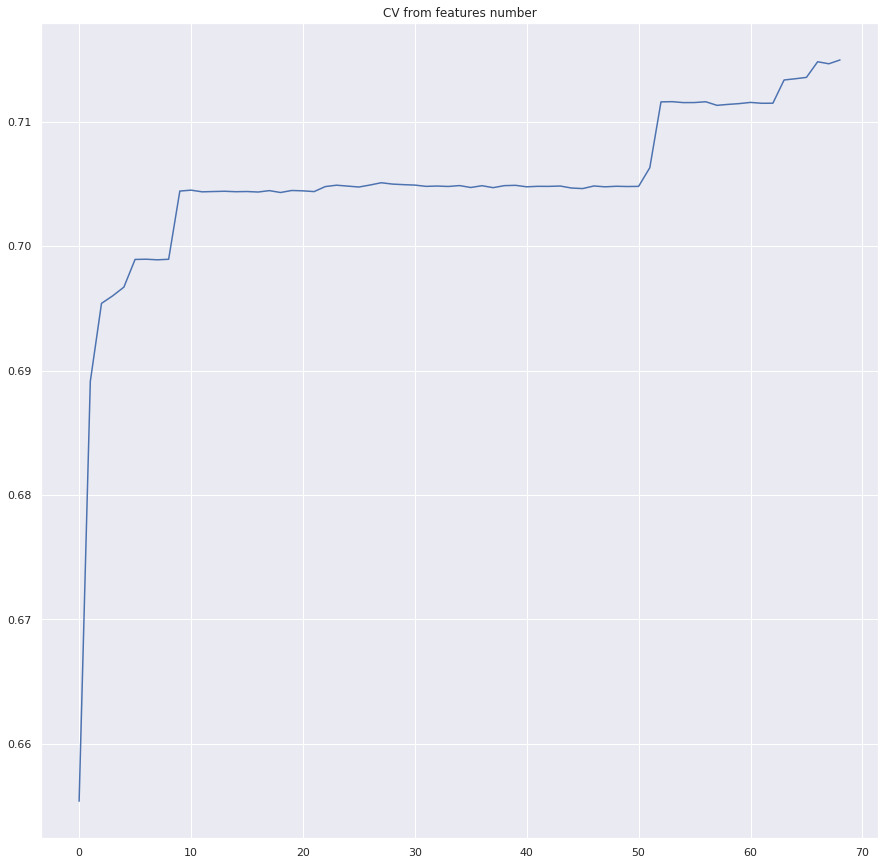

In [158]:
plt.figure(figsize=(15,15))
plt.plot(cv_from_features_number['Features number'], cv_from_features_number['cv score'])
plt.title('CV from features number')

In [ ]:
#Посмотрим на корреляции количественных признаков.

In [159]:
corr_matrix = features[all_features_importance.loc[30:50, 'feature']].corr()

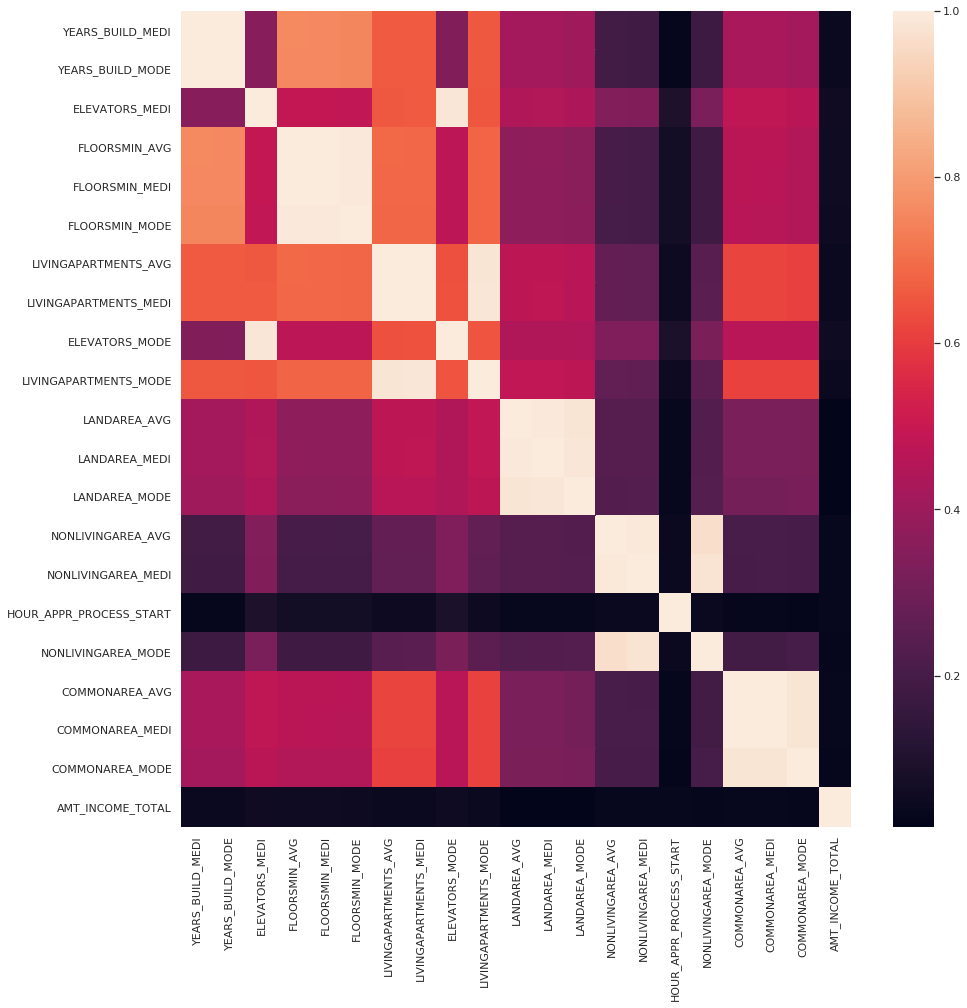

In [160]:
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix)